In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [25]:
xtrain = train_datagen.flow_from_directory('/content//drive/MyDrive/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 1701 images belonging to 1 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [7]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Fully connected layers (ANN)
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='softmax')) # Output layer

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:

model.save('Flower.h5')

In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [14]:
img = image.load_img('/content/drive/MyDrive/flowers/flowers/dandelion/10683189_bd6e371b97.jpg',target_size=(64,64))

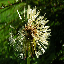

In [15]:
img

In [16]:
x = image.img_to_array(img)
x

array([[[ 58.,  96.,  11.],
        [ 43.,  87.,   2.],
        [ 54.,  82.,   8.],
        ...,
        [ 14.,  27.,   9.],
        [ 19.,  37.,   0.],
        [ 12.,  24.,   4.]],

       [[ 63., 113.,   0.],
        [ 70., 116.,   8.],
        [ 72., 124.,  16.],
        ...,
        [ 26.,  35.,   6.],
        [ 21.,  37.,   0.],
        [ 53.,  79.,  31.]],

       [[ 85., 133.,  15.],
        [ 90., 134.,  23.],
        [ 95., 134.,  25.],
        ...,
        [  7.,  19.,   5.],
        [ 17.,  27.,  16.],
        [ 14.,  35.,   2.]],

       ...,

       [[ 12.,  25.,   7.],
        [ 12.,  25.,   8.],
        [ 14.,  28.,   5.],
        ...,
        [  0.,   2.,   0.],
        [  1.,   3.,   0.],
        [ 25.,  33.,  22.]],

       [[ 12.,  25.,   7.],
        [ 13.,  27.,   4.],
        [ 21.,  36.,   7.],
        ...,
        [  0.,   2.,   0.],
        [  1.,   3.,   0.],
        [  0.,   5.,   0.]],

       [[ 13.,  26.,   9.],
        [ 12.,  24.,   2.],
        [  9.,  

In [17]:
x = np.expand_dims(x,axis=0)
x

array([[[[ 58.,  96.,  11.],
         [ 43.,  87.,   2.],
         [ 54.,  82.,   8.],
         ...,
         [ 14.,  27.,   9.],
         [ 19.,  37.,   0.],
         [ 12.,  24.,   4.]],

        [[ 63., 113.,   0.],
         [ 70., 116.,   8.],
         [ 72., 124.,  16.],
         ...,
         [ 26.,  35.,   6.],
         [ 21.,  37.,   0.],
         [ 53.,  79.,  31.]],

        [[ 85., 133.,  15.],
         [ 90., 134.,  23.],
         [ 95., 134.,  25.],
         ...,
         [  7.,  19.,   5.],
         [ 17.,  27.,  16.],
         [ 14.,  35.,   2.]],

        ...,

        [[ 12.,  25.,   7.],
         [ 12.,  25.,   8.],
         [ 14.,  28.,   5.],
         ...,
         [  0.,   2.,   0.],
         [  1.,   3.,   0.],
         [ 25.,  33.,  22.]],

        [[ 12.,  25.,   7.],
         [ 13.,  27.,   4.],
         [ 21.,  36.,   7.],
         ...,
         [  0.,   2.,   0.],
         [  1.,   3.,   0.],
         [  0.,   5.,   0.]],

        [[ 13.,  26.,   9.],
       

In [18]:
model.predict(x)

array([[0.0000000e+00, 5.8820974e-19, 2.2801103e-20, 1.0000000e+00]],
      dtype=float32)

In [22]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'

In [23]:
img = image.load_img('/content/drive/MyDrive/flowers/flowers/daisy/5673551_01d1ea993e_n.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'